# Week 4: Basics of Bluesky

## RunEngine

In [1]:
from bluesky.run_engine import RunEngine

In [4]:
RE = RunEngine()

In [10]:
info = dir(RE)

## Subscriptions

In [11]:
from databroker import Broker
db = Broker.named("temp")

Tiled version 0.1.0a120
INFO:tiled.server.app:Tiled version 0.1.0a120


In [87]:
dir(db.reg._catalog.context)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_token_cache',
 '_token_directory',
 '_verify',
 'admin',
 'api_key',
 'api_uri',
 'app',
 'authenticate',
 'base_url',
 'cache',
 'close',
 'create_api_key',
 'event_hooks',
 'force_auth_refresh',
 'from_any_uri',
 'from_app',
 'http_client',
 'login',
 'logout',
 'revoke_api_key',
 'revoke_session',
 'server_info',
 'tokens',
 'which_api_key',
 'whoami']

In [21]:
RE.subscribe(db.insert)

1

In [48]:
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

In [50]:
RE.subscribe(bec)

2

In [68]:
bec.disable_plots()
bec.enable_table()

## Plans

In [14]:
from bluesky.plans import count, scan

In [54]:
from ophyd.sim import det, noisy_det, motor1, motor2, motor

In [80]:
from ophyd import Kind
det.val.kind = Kind.hinted

In [81]:
uid, = RE(scan([det, noisy_det], motor, -1, 1, 11))



Transient Scan ID: 22     Time: 2025-05-02 14:50:28
Persistent Unique Scan ID: '96df71b3-2af7-4de6-a1b4-3b9f1046a42c'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |      motor |  noisy_det |        det |
+-----------+------------+------------+------------+------------+
|         1 | 14:50:28.1 |     -1.000 |      0.705 |      0.607 |
|         2 | 14:50:28.2 |     -0.800 |      0.791 |      0.726 |
|         3 | 14:50:28.2 |     -0.600 |      0.736 |      0.835 |
|         4 | 14:50:28.2 |     -0.400 |      0.959 |      0.923 |
|         5 | 14:50:28.2 |     -0.200 |      0.996 |      0.980 |
|         6 | 14:50:28.2 |      0.000 |      1.067 |      1.000 |
|         7 | 14:50:28.2 |      0.200 |      1.024 |      0.980 |
|         8 | 14:50:28.2 |      0.400 |      0.986 |      0.923 |
|         9 | 14:50:28.2 |      0.600 |      0.870 |      0.835 |
|        10 | 14:50:28.2 |      0.800 |      0.640 |      0.726 |


In [82]:
db[uid].table()

,motor,motor_setpoint,noisy_det,det,time
seq_num,,,,,
1,-1.0,-1.0,0.704705,0.606531,2025-05-02 18:50:28.195249557
2,-0.8,-0.8,0.791280,0.726149,2025-05-02 18:50:28.205134392
3,-0.6,-0.6,0.735855,0.835270,2025-05-02 18:50:28.215086699
4,-0.4,-0.4,0.959407,0.923116,2025-05-02 18:50:28.226104498
5,-0.2,-0.2,0.995815,0.980199,2025-05-02 18:50:28.235881805
6,0.0,0.0,1.067222,1.000000,2025-05-02 18:50:28.245766878
7,0.2,0.2,1.024224,0.980199,2025-05-02 18:50:28.255497931
8,0.4,0.4,0.986324,0.923116,2025-05-02 18:50:28.265731096
9,0.6,0.6,0.869761,0.835270,2025-05-02 18:50:28.275486708


In [29]:
db[uid].table()

,noisy_det,det,time
seq_num,,,
1,0.902390,1.0,2025-05-02 18:27:26.929145575
2,0.955151,1.0,2025-05-02 18:27:26.937193871
3,1.091195,1.0,2025-05-02 18:27:26.945229053
4,1.007753,1.0,2025-05-02 18:27:26.953525066
5,0.923725,1.0,2025-05-02 18:27:26.961702824
6,0.963055,1.0,2025-05-02 18:27:26.969887018
7,1.003251,1.0,2025-05-02 18:27:26.977848530
8,1.059424,1.0,2025-05-02 18:27:26.986316204
9,0.942363,1.0,2025-05-02 18:27:26.994312286


In [38]:
from pprint import pformat
for name, doc in db[uid].documents():
    print(f"{name = }\n{pformat(doc)}\n===========\n")

name = 'start'
{'detectors': ['det', 'noisy_det'],
 'hints': {'dimensions': [[['time'], 'primary']]},
 'num_intervals': 9,
 'num_points': 10,
 'plan_args': {'delay': None,
               'detectors': ["SynGauss(prefix='', name='det', "
                             "read_attrs=['val'], configuration_attrs=['Imax', "
                             "'center', 'sigma', 'noise', 'noise_multiplier'])",
                             "SynGauss(prefix='', name='noisy_det', "
                             "read_attrs=['val'], configuration_attrs=['Imax', "
                             "'center', 'sigma', 'noise', "
                             "'noise_multiplier'])"],
               'num': 10},
 'plan_name': 'count',
 'plan_type': 'generator',
 'scan_id': 8,
 'time': 1746210619.8251574,
 'uid': 'be16b1e4-1682-4d49-98f7-259f86c33ac0',
 'versions': {'bluesky': '1.13.0a3', 'ophyd': '1.9.0'}}

name = 'descriptor'
{'configuration': {'det': {'data': {'det_Imax': 1,
                                    'det

In [46]:
db[uid].table().iloc[8].time

Timestamp('2025-05-02 18:30:19.914616108')

In [24]:
db["eafe46ce-353d-4e42-a868-3fed3b2c6158"]

## Metadata

In [91]:
RE.md.update({"beamline": "TST", "proposal": 123})
RE.md

{'beamline': 'TST', 'proposal': 123}

In [105]:
uid, = RE(  count([noisy_det], ), mood="optimistic")



Transient Scan ID: 8     Time: 2025-05-02 15:02:56
Persistent Unique Scan ID: 'b439109d-5418-4812-81fe-63f68d4ab8a9'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |  noisy_det |
+-----------+------------+------------+
|         1 | 15:02:56.4 |      0.593 |
+-----------+------------+------------+
generator count ['b439109d'] (scan num: 8)





In [103]:
def top_level(md={"sample": {"formula": "C2H6"}}):
    yield from count([noisy_det], md=md)
    yield from count([det], md={"test": "yes"})

In [104]:
uid, = RE(top_level())



Transient Scan ID: 6     Time: 2025-05-02 15:01:36
Persistent Unique Scan ID: 'ab61e3fe-12f1-4313-81ff-cc389e0a136d'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |  noisy_det |
+-----------+------------+------------+
|         1 | 15:01:36.7 |      0.696 |
+-----------+------------+------------+
generator count ['ab61e3fe'] (scan num: 6)





Transient Scan ID: 7     Time: 2025-05-02 15:01:36
Persistent Unique Scan ID: '1d909bbc-8e85-4810-8388-52a364b95860'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |        det |
+-----------+------------+------------+
|         1 | 15:01:36.8 |      0.607 |
+-----------+------------+------------+
generator count ['1d909bbc'] (scan num: 7)





ValueError: too many values to unpack (expected 1)

In [106]:
db[uid].start

{'uid': 'b439109d-5418-4812-81fe-63f68d4ab8a9',
 'time': 1746212576.3777032,
 'beamline': 'TST',
 'proposal': 123,
 'scan_id': 8,
 'plan_type': 'generator',
 'plan_name': 'count',
 'detectors': ['noisy_det'],
 'num_points': 1,
 'num_intervals': 0,
 'plan_args': {'detectors': ["SynGauss(prefix='', name='noisy_det', read_attrs=['val'], configuration_attrs=['Imax', 'center', 'sigma', 'noise', 'noise_multiplier'])"],
  'num': 1,
  'delay': None},
 'hints': {'dimensions': [[['time'], 'primary']]},
 'mood': 'optimistic'}

## Plan Simulators

In [107]:
def top_level(md={"sample": {"formula": "C2H6"}}):
    yield from count([noisy_det], md=md)
    yield from count([det], md={"test": "yes"})

In [113]:
plan = top_level()

In [111]:
from bluesky.simulators import summarize_plan

In [115]:
summarize_plan(scan([det], motor, -1, 1, 11))

=================================== Open Run ===================================
motor -> -1.0
  Read ['det', 'motor']
motor -> -0.8
  Read ['det', 'motor']
motor -> -0.6
  Read ['det', 'motor']
motor -> -0.3999999999999999
  Read ['det', 'motor']
motor -> -0.19999999999999996
  Read ['det', 'motor']
motor -> 0.0
  Read ['det', 'motor']
motor -> 0.20000000000000018
  Read ['det', 'motor']
motor -> 0.40000000000000013
  Read ['det', 'motor']
motor -> 0.6000000000000001
  Read ['det', 'motor']
motor -> 0.8
  Read ['det', 'motor']
motor -> 1.0
  Read ['det', 'motor']
================================== Close Run ===================================


In [116]:
from bluesky.simulators import plot_raster_path

In [117]:
from bluesky.plans import grid_scan

In [120]:
summarize_plan(grid_scan([det], motor1, -1, 1, 11, motor2, 0, 5, 7))

=================================== Open Run ===================================
motor1 -> -1.0
motor2 -> 0.0
  Read ['det', 'motor1', 'motor2']
motor2 -> 0.8333333333333334
  Read ['det', 'motor1', 'motor2']
motor2 -> 1.6666666666666667
  Read ['det', 'motor1', 'motor2']
motor2 -> 2.5
  Read ['det', 'motor1', 'motor2']
motor2 -> 3.3333333333333335
  Read ['det', 'motor1', 'motor2']
motor2 -> 4.166666666666667
  Read ['det', 'motor1', 'motor2']
motor2 -> 5.0
  Read ['det', 'motor1', 'motor2']
motor1 -> -0.8
motor2 -> 0.0
  Read ['det', 'motor1', 'motor2']
motor2 -> 0.8333333333333334
  Read ['det', 'motor1', 'motor2']
motor2 -> 1.6666666666666667
  Read ['det', 'motor1', 'motor2']
motor2 -> 2.5
  Read ['det', 'motor1', 'motor2']
motor2 -> 3.3333333333333335
  Read ['det', 'motor1', 'motor2']
motor2 -> 4.166666666666667
  Read ['det', 'motor1', 'motor2']
motor2 -> 5.0
  Read ['det', 'motor1', 'motor2']
motor1 -> -0.6
motor2 -> 0.0
  Read ['det', 'motor1', 'motor2']
motor2 -> 0.833333333

{'path': <matplotlib.lines.Line2D at 0x14bd57e0db90>,
 'events': <matplotlib.collections.PathCollection at 0x14bd57ed3550>}

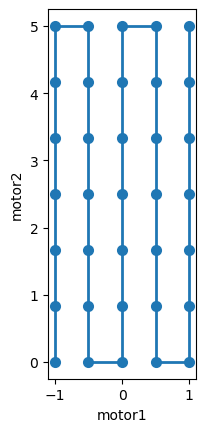

In [124]:
plot_raster_path(grid_scan([det], motor1, -1, 1, 5, motor2, 0, 5, 7, True), motor1.name, motor2.name)